<a href="https://colab.research.google.com/github/FrankSheng1999/Frank/blob/master/cyclic_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'Mean': np.float64(34.1173465670945), 'Median': 32.73936224300995, 'Min': 24.8980985209346, 'Max': 49.9481439974625, '95th Percentile': np.float64(44.246640514793384)}
{'Mean': np.float64(31.310979084368835), 'Median': 30.54158590501175, 'Min': 20.4175257496536, 'Max': 47.3691279441118, '95th Percentile': np.float64(39.7644607548136)}
c = : 65.43
n = : 7.0


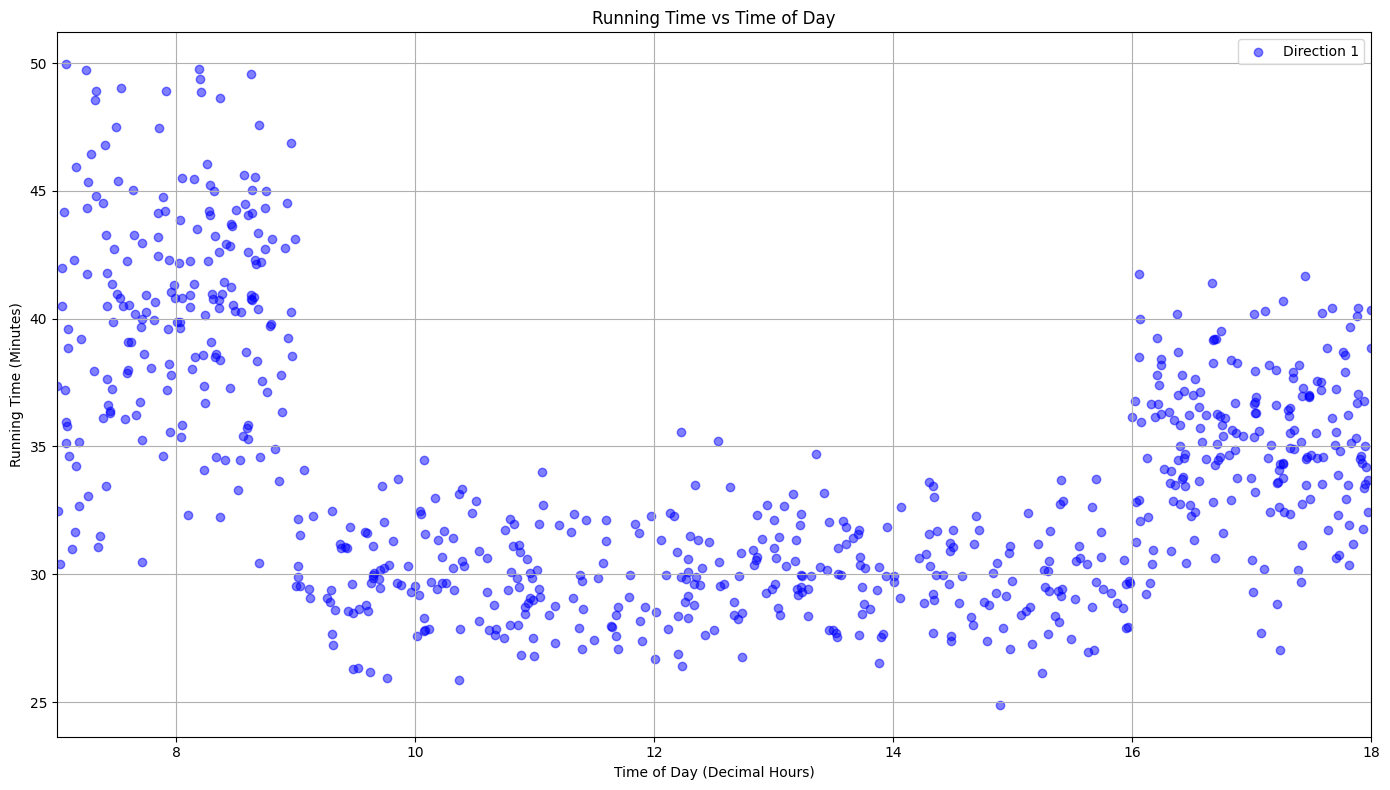

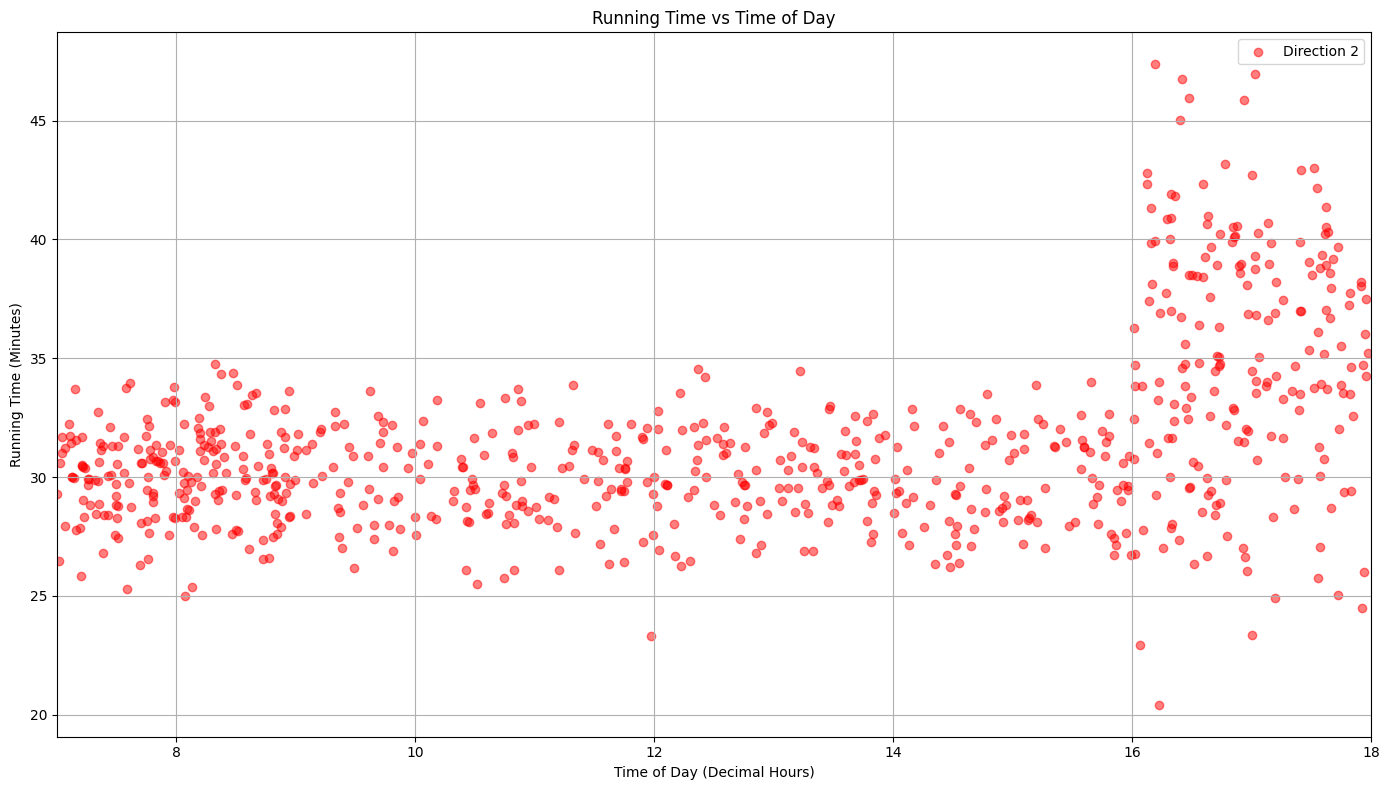

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math
file_path = "/mnt/1-Cyclic operations in transit-Data.xlsx" #文件路径
xls = pd.ExcelFile(file_path)

# 读取方向1和方向2的数据
df_dir1 = pd.read_excel(file_path, sheet_name="direction1", header=None, skiprows=1, names=["StartTime", "Duration"])
df_dir2 = pd.read_excel(file_path, sheet_name="direction2", header=None, skiprows=1, names=["StartTime", "Duration"])

df_dir1["Duration"] = pd.to_numeric(df_dir1["Duration"], errors="coerce")
df_dir2["Duration"] = pd.to_numeric(df_dir2["Duration"], errors="coerce")

# 1. 利用每个方向的所有观测数据计算平均值、中位数、最小值、最大值和第 95
# 百分位运行时间。(每个统计量应该有两个，每个方向一个）。
def compute_statistics(df):
    return {
        "Mean": df["Duration"].mean(),
        "Median": df["Duration"].median(),
        "Min": df["Duration"].min(),
        "Max": df["Duration"].max(),
        "95th Percentile": df["Duration"].quantile(0.95)
    }
stats_dir1 = compute_statistics(df_dir1)
stats_dir2 = compute_statistics(df_dir2)
print(stats_dir1)
print(stats_dir2)

# 2. 简单路线的周期时间 c 的计算公式为:c = t1 + r1 + t2 + r2
# 使用第 3 步计算的统计数据，计算每个方向的运行时间、恢
# 复时间和半周期时间，以及该计划运输服务的周期时间。
t1 = stats_dir1["Mean"]  # 方向 1 平均运行时间
t2 = stats_dir2["Mean"]  # 方向 2 平均运行时间
r1, r2 = 0, 0 # 假设恢复时间为 0

cycle_time = t1 + r1 + t2 + r2
print("c = :", round(cycle_time,2))


# 3. 回顾周期时间 c、班次间隔 h 和车辆数 n 之间的关系为
# c = nh 或 n = c/h
# 使用步骤 4 中的周期时间，计算在 10 分钟车程内提供服务所需的车辆数。
h = 10
n = cycle_time / 10
print("n = :", round(n, 0))

# 4. 按一天中的时间对每个方向的数据进行分类，并生成每个方向的运行时间与
# 一天中时间的函数关系散点图。

# 绘制1的散点图
plt.figure(figsize=(14, 8))
plt.scatter(
    pd.to_numeric(df_dir1['StartTime']),
    pd.to_numeric(df_dir1['Duration']),
    alpha=0.5,
    label='Direction 1',
    color='blue'
)

# 保持原有图表设置
plt.title('Running Time vs Time of Day')
plt.xlabel('Time of Day (Decimal Hours)')
plt.ylabel('Running Time (Minutes)')
plt.grid(True)
plt.legend()
plt.xlim(7, 18)  # 7:00-18:00

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.scatter(
    pd.to_numeric(df_dir2['StartTime']),
    pd.to_numeric(df_dir2['Duration']),
    alpha=0.5,
    label='Direction 2',
    color='red'
)
plt.title('Running Time vs Time of Day')
plt.xlabel('Time of Day (Decimal Hours)')
plt.ylabel('Running Time (Minutes)')
plt.grid(True)
plt.legend()
plt.xlim(7, 18)  # 7:00-18:00

plt.tight_layout()
plt.show()